# Contents
#### 1. Import Library and Data
#### 2.Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

# 1. Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define path
path=r' C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County'

In [4]:
# Import the dataset
df = pd.read_csv(r'C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County\Data\Adjusted Data\kc_house_data.csv', index_col = False) 

# 2. Cleaning Data

In [5]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date_of_sale,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price category,lat_long
0,0,0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,...,7,1180,0,1955,0,98178,47.5112,-122.257,Middle price,"(47.5112, -122.257)"
1,1,1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,...,7,2170,400,1951,1991,98125,47.7210,-122.319,High price,"(47.721, -122.319)"
2,2,2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,...,6,770,0,1933,0,98028,47.7379,-122.233,Low price,"(47.7379, -122.233)"
3,3,3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,...,7,1050,910,1965,0,98136,47.5208,-122.393,High price,"(47.5208, -122.393)"
4,4,4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,...,8,1680,0,1987,0,98074,47.6168,-122.045,High price,"(47.6168, -122.045)"


In [6]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'date_of_sale',
       'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'price category', 'lat_long'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

,id,date_of_sale,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price category,lat_long
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,Middle price,"(47.5112, -122.257)"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,High price,"(47.721, -122.319)"
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,Low price,"(47.7379, -122.233)"
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,High price,"(47.5208, -122.393)"
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,High price,"(47.6168, -122.045)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,Middle price,"(47.6993, -122.346)"
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,Middle price,"(47.5107, -122.362)"
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,Middle price,"(47.5944, -122.299)"
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,Middle price,"(47.5345, -122.069)"


In [8]:
# check for missing values

df.isnull().sum()

Unnamed: 0.2      0
Unnamed: 0.1      0
Unnamed: 0        0
id                0
date_of_sale      0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
price category    0
lat_long          0
dtype: int64

In [9]:
# check for duplicate values

dups = df.duplicated()

In [10]:
dups.shape

(21613,)

C:\Users\cmas9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

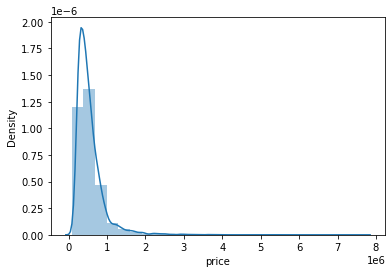

In [11]:
# Check for extreme values
sns.distplot(df['price'],bins = 25, kde = True)

In [12]:
# check the mean

df['price'].mean() 

540088.1417665294

In [13]:
# check the median

df['price'].median() 

450000.0

In [14]:
# check the max

df['price'].max()

7700000.0

# 3. Data prep for regression analysis

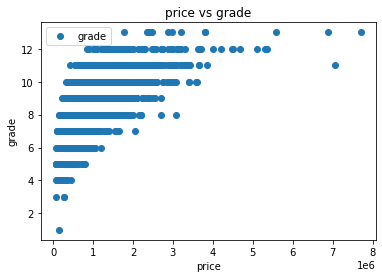

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'price', y='grade',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('price vs grade')  
plt.xlabel('price')  
plt.ylabel('grade')  
plt.show()

##### Hypothesis: The higher the grade the higher the price of the house.

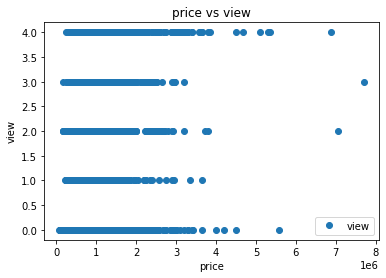

In [16]:
df.plot(x = 'price', y='view',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('price vs view')  
plt.xlabel('price')  
plt.ylabel('view')  
plt.show()

##### Hypothesis: The better the view (4 rating) the higher the price of the home.

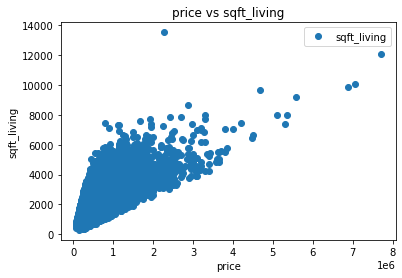

In [17]:
df.plot(x = 'price', y='sqft_living',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('price vs sqft_living')  
plt.xlabel('price')  
plt.ylabel('sqft_living')  
plt.show()

In [18]:
# reshape the variables into NumPy arrays and put them into separate objects

X = df['price'].values.reshape(-1,1)
y = df['view'].values.reshape(-1,1)

In [19]:
X

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [20]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [21]:
# split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# reshape the variables into NumPy arrays and put them into separate objects

X2 = df['price'].values.reshape(-1,1)
y2 = df['view'].values.reshape(-1,1)

In [23]:
X2

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [24]:
y2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [25]:
# split data into a training set and a test set

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# 4. Regression analysis

In [26]:
# Create regression object
regression = LinearRegression()

In [27]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

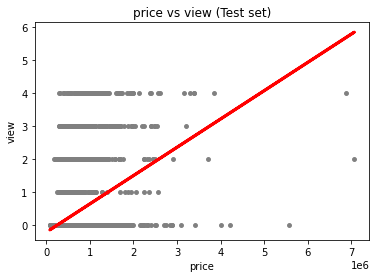

In [29]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('price vs view (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('view')
plot_test.show()

##### The line fits the data. The better the view the higher the price of the house.

In [30]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [31]:
 # print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.60230198e-07]]
Mean squared error:  0.5096183678515954
R2 score:  0.13223798160691957


#####  The slope is positive so there is a positive relationship. This aligns with my hypothesis that the better the view the higher the cost of the house.

In [32]:
y_predicted

array([[ 0.02614841],
       [ 1.12810329],
       [ 0.25419543],
       ...,
       [ 0.09754751],
       [ 0.00120173],
       [-0.05213254]])

In [33]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.026148
1,0,1.128103
2,0,0.254195
3,0,0.313895
4,2,0.441640
5,0,0.187872
6,0,0.063138
7,0,0.059358
8,0,0.136258
9,2,0.192173


In [34]:
# predict

y_predicted_train = regression.predict(X_train) 

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.60230198e-07]]
Mean squared error:  0.4882464119205909
R2 score:  0.16849173392107208


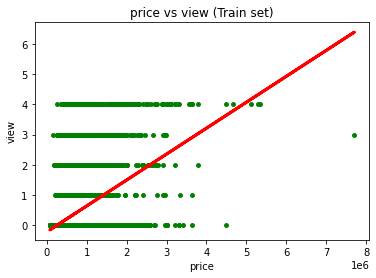

In [37]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('price vs view (Train set)')
plot_test.xlabel('price')
plot_test.ylabel('view')
plot_test.show()

##### The slope is exactly the same and the mean and R2 are very close to being the same as well, meaning the model was not overdone. The plot is also very close to the same. R2 is very low, confirming that this is not enough correlation.

In [38]:
# create a regression object

regression = LinearRegression()

In [39]:
# fit the regression object onto the training set

regression.fit(X2_train, y2_train)

LinearRegression()

In [40]:
# predict the values of y using X

y2_predicted = regression.predict(X2_test)

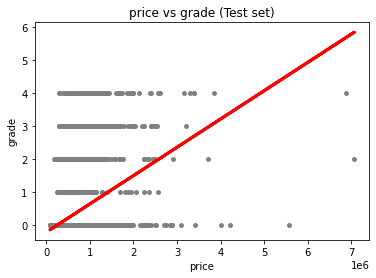

In [41]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('price vs grade (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('grade')
plot_test.show()

In [42]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y2_test, y2_predicted) 
r2 = r2_score(y2_test, y2_predicted)

In [43]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.60230198e-07]]
Mean squared error:  0.5096183678515954
R2 score:  0.13223798160691957


##### The slope is positive show there is a positive relationship between the price and grade of the house. This is inline with my hypothesis although the R2 is 0.13 showing a poor fit.

In [44]:
y2_predicted

array([[ 0.02614841],
       [ 1.12810329],
       [ 0.25419543],
       ...,
       [ 0.09754751],
       [ 0.00120173],
       [-0.05213254]])

In [45]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.026148
1,0,1.128103
2,0,0.254195
3,0,0.313895
4,2,0.441640
5,0,0.187872
6,0,0.063138
7,0,0.059358
8,0,0.136258
9,2,0.192173


In [46]:
# predict

y2_predicted_train = regression.predict(X2_train) 

In [47]:
rmse = mean_squared_error(y2_train, y2_predicted_train)
r2 = r2_score(y2_train, y2_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.60230198e-07]]
Mean squared error:  0.4882464119205909
R2 score:  0.16849173392107208


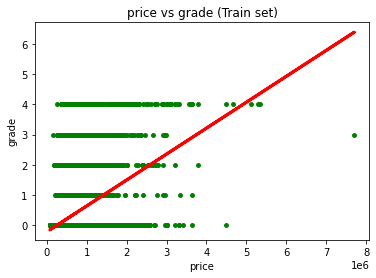

In [49]:
# visualizing the training set results

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('price vs grade (Train set)')
plot_test.xlabel('price')
plot_test.ylabel('grade')
plot_test.show()

##### The slope is exactly the same and the MSE and R2 are very closel, meaning the model was not overdone. The plot is also very close to the same. R2 is very low, confirming that this is not enough correlation.

In [50]:
df.to_csv(r'C:\Users\cmas9\OneDrive\Documents\Master folder\House Sales in King County\Data\Adjusted Data\kc_house_data.csv')